In [168]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier,plot_importance
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns


### Data Exploration

In [112]:
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [4]:
print(df)

     Y  X1  X2  X3  X4  X5  X6
0    0   3   3   3   4   2   4
1    0   3   2   3   5   4   3
2    1   5   3   3   3   3   5
3    0   5   4   3   3   3   5
4    0   5   4   3   3   3   5
..  ..  ..  ..  ..  ..  ..  ..
121  1   5   2   3   4   4   3
122  1   5   2   3   4   2   5
123  1   5   3   3   4   4   5
124  0   4   3   3   4   4   5
125  0   5   3   2   5   5   5

[126 rows x 7 columns]


In [5]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [6]:
df.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [7]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


### Data cleaning

1) Check if there are NaN values

In [9]:
# Check NaN values for columns
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

2) Check for outliers

<Axes: >

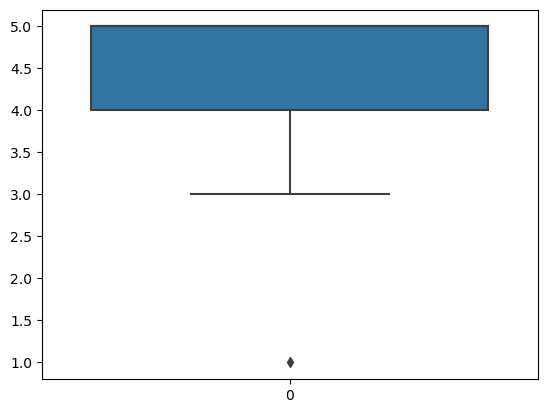

In [10]:
sns.boxplot(df['X1'])

<Axes: >

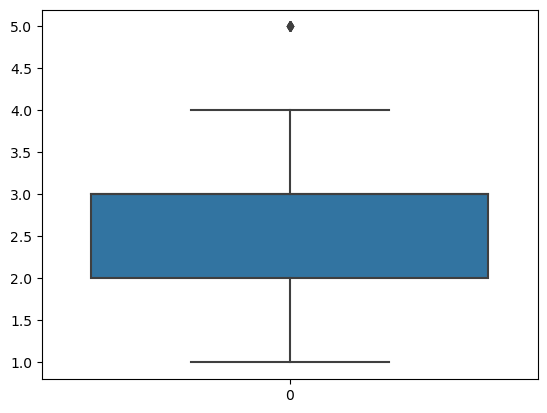

In [11]:
sns.boxplot(df['X2'])

<Axes: >

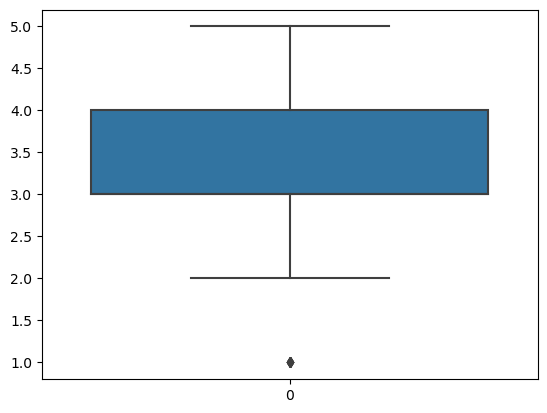

In [12]:
sns.boxplot(df['X3'])

<Axes: >

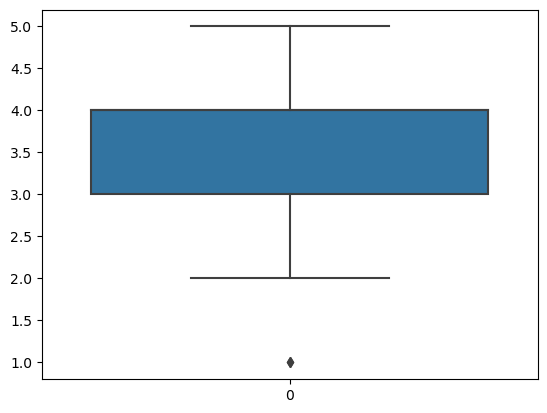

In [13]:
sns.boxplot(df['X4'])

<Axes: >

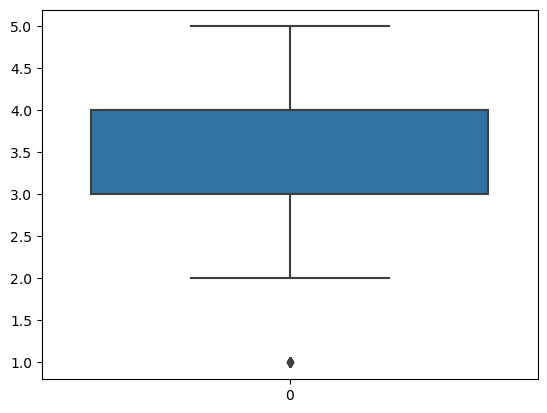

In [14]:
sns.boxplot(df['X5'])

<Axes: >

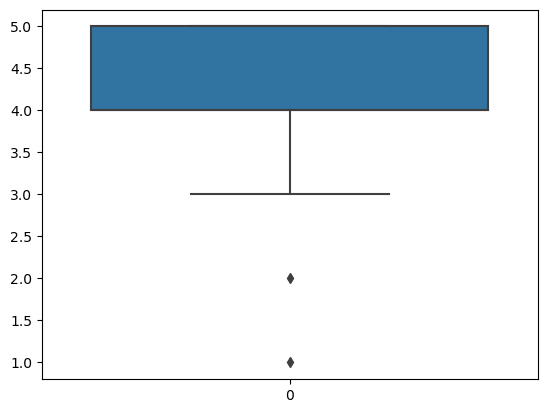

In [15]:
sns.boxplot(df['X6'])

From the box plots above it may seems that there outliers but from the project specification we know that all the features need to be in the range 1-5 and this is true examining the graphs. We can then say that there are not outliers.

### Visualize data and features engineering

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\1826636702.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


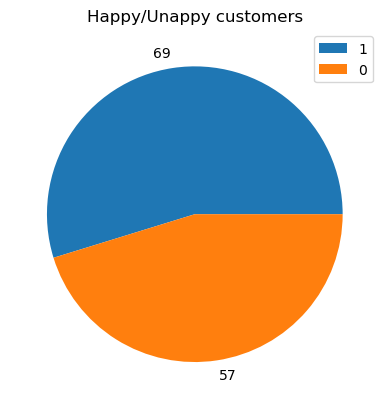

In [16]:
fig, ax = plt.subplots()
happy_counts = df['Y'].value_counts()
ax.pie(happy_counts, labels=happy_counts)
ax.set_title('Happy/Unappy customers')
ax.legend(happy_counts.keys().tolist())
fig.show()

In [17]:
df_happy = df[df.Y==1]
df_happy.shape

69

In [18]:
df_nothappy = df[df.Y==0]
df_nothappy.shape

(57, 7)

In [19]:
#def show_plot_features(happy_counts_f, not_happy_counts_f, title):
#    fig, ax = plt.subplots(1, 2, figsize = (15,8))
#    ax[0].pie(happy_counts_f, labels=happy_counts_f)
#    ax[0].set_title('Happy customer')
#    ax[0].legend(happy_counts_f.keys().tolist())
#    ax[1].pie(not_happy_counts_f, labels=not_happy_counts_f)
#    ax[1].set_title('Not happy customer')
#    ax[1].legend(not_happy_counts_f.keys().tolist())
#    fig.suptitle(title)
#    # Display the plot
#    plt.show()

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\2081107944.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X1 = [round((df_happy[df.X1==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==5]).shape[0]/df_happy.shape[0]*100,2)]


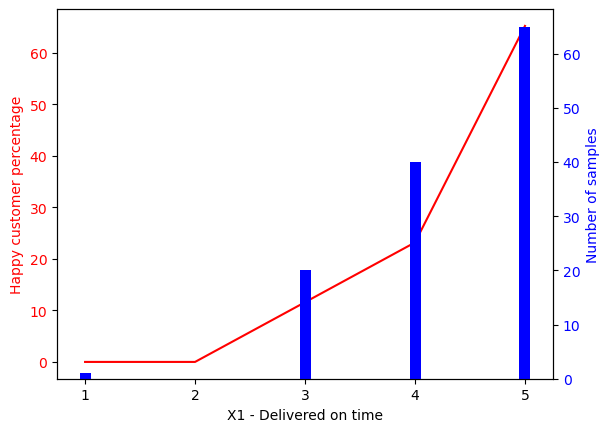

In [84]:
#happy_counts_X1 = df_happy['X1'].value_counts()
#not_happy_counts_X1 = df_nothappy['X1'].value_counts()
#show_plot_features(happy_counts_X1, not_happy_counts_X1, 'Relation delivered on time and happiness')
label = [1,2,3,4,5]
perc_X1 = [round((df_happy[df.X1==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X1==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X1 = [(df[df.X1==1]).shape[0], (df[df.X1==2]).shape[0], (df[df.X1==3]).shape[0], (df[df.X1==4]).shape[0], (df[df.X1==5]).shape[0]]
# Create Plot

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel("X1 - Delivered on time") 
ax1.set_ylabel('Happy customer percentage', color = 'red') 
ax1.plot(label,perc_X1, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X1,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()


C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\3259305025.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X2 = [round((df_happy[df.X2==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==5]).shape[0]/df_happy.shape[0]*100,2)]


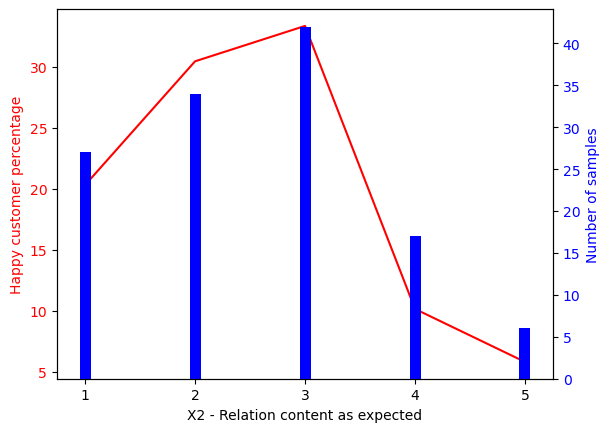

In [85]:
#happy_counts_X2 = df_happy['X2'].value_counts()
#not_happy_counts_X2 = df_nothappy['X2'].value_counts()
#show_plot_features(happy_counts_X2, not_happy_counts_X2, 'Relation content as expected and happiness')
perc_X2 = [round((df_happy[df.X2==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X2==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X2 = [(df[df.X2==1]).shape[0], (df[df.X2==2]).shape[0], (df[df.X2==3]).shape[0], (df[df.X2==4]).shape[0], (df[df.X2==5]).shape[0]]
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel("X2 - Relation content as expected")
ax1.set_ylabel("Happy customer percentage",color='red')
ax1.plot(label,perc_X2,color='red')
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X2,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()


C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\3949491081.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X3 = [round((df_happy[df.X3==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==5]).shape[0]/df_happy.shape[0]*100,2)]


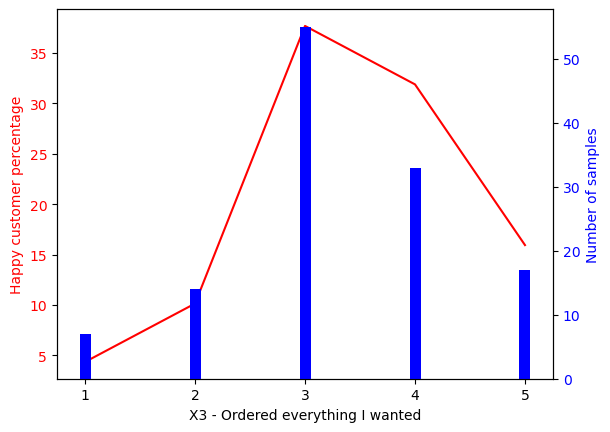

In [86]:
#happy_counts_X3 = df_happy['X3'].value_counts()
#not_happy_counts_X3 = df_nothappy['X3'].value_counts()
#show_plot_features(happy_counts_X3, not_happy_counts_X3, 'Relation ordered everything I wanted and happiness')
perc_X3 = [round((df_happy[df.X3==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X3==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X3 = [(df[df.X3==1]).shape[0], (df[df.X3==2]).shape[0], (df[df.X3==3]).shape[0], (df[df.X3==4]).shape[0], (df[df.X3==5]).shape[0]]
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel("X3 - Ordered everything I wanted")
ax1.set_ylabel("Happy customer percentage",color='red')
ax1.plot(label,perc_X3,color='red')
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X3,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()


C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\1661031701.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X4 = [round((df_happy[df.X4==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==5]).shape[0]/df_happy.shape[0]*100,2)]


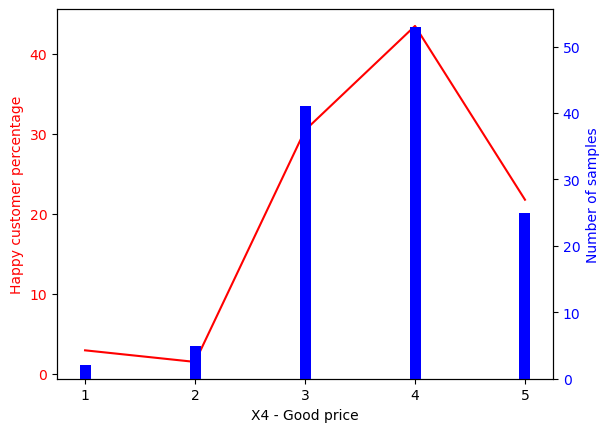

In [87]:
#happy_counts_X4 = df_happy['X4'].value_counts()
#not_happy_counts_X4 = df_nothappy['X4'].value_counts()
#show_plot_features(happy_counts_X4, not_happy_counts_X4, 'Relation good price and happiness')
perc_X4 = [round((df_happy[df.X4==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X4==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X4 = [(df[df.X4==1]).shape[0], (df[df.X4==2]).shape[0], (df[df.X4==3]).shape[0], (df[df.X4==4]).shape[0], (df[df.X4==5]).shape[0]]
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel("X4 - Good price")
ax1.set_ylabel("Happy customer percentage",color='red')
ax1.plot(label,perc_X4,color='red')
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X4,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\2709054213.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X5 = [round((df_happy[df.X5==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==5]).shape[0]/df_happy.shape[0]*100,2)]


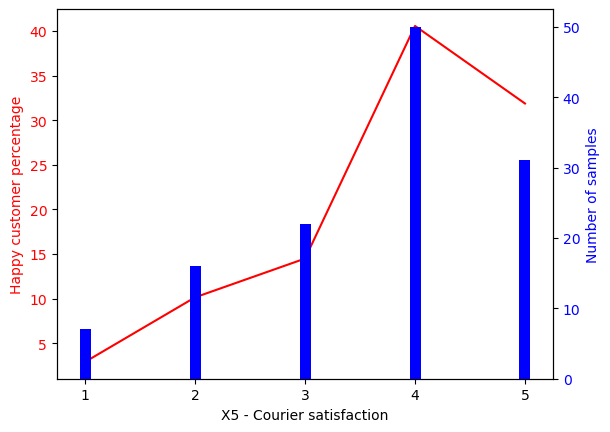

In [88]:
#happy_counts_X5 = df_happy['X5'].value_counts()
#not_happy_counts_X5 = df_nothappy['X5'].value_counts()
#show_plot_features(happy_counts_X5, not_happy_counts_X5, 'Relation courier satisfaction and happiness')
perc_X5 = [round((df_happy[df.X5==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X5==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X5 = [(df[df.X5==1]).shape[0], (df[df.X5==2]).shape[0], (df[df.X5==3]).shape[0], (df[df.X5==4]).shape[0], (df[df.X5==5]).shape[0]]
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel("X5 - Courier satisfaction")
ax1.set_ylabel("Happy customer percentage",color='red')
ax1.plot(label,perc_X5,color='red')
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X5,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

C:\Users\PicardiC\AppData\Local\Temp\ipykernel_20428\1278112908.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  perc_X6 = [round((df_happy[df.X6==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==5]).shape[0]/df_happy.shape[0]*100,2)]


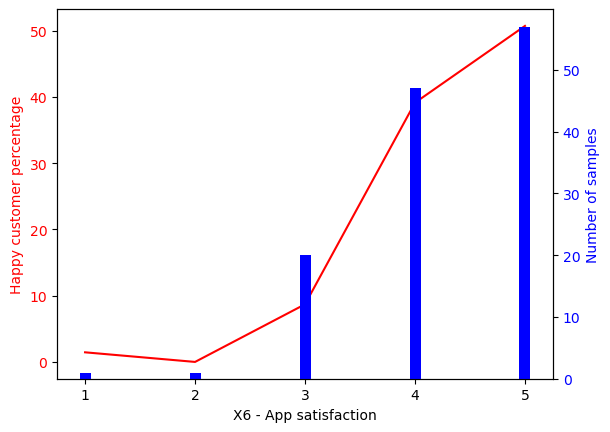

In [89]:
#happy_counts_X6 = df_happy['X6'].value_counts()
#not_happy_counts_X6 = df_nothappy['X6'].value_counts()
#show_plot_features(happy_counts_X6, not_happy_counts_X6, 'Relation app satisfaction and happiness')
perc_X6 = [round((df_happy[df.X6==1]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==2]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==3]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==4]).shape[0]/df_happy.shape[0]*100,2),round((df_happy[df.X6==5]).shape[0]/df_happy.shape[0]*100,2)]
num_samples_X6 = [(df[df.X6==1]).shape[0], (df[df.X6==2]).shape[0], (df[df.X6==3]).shape[0], (df[df.X6==4]).shape[0], (df[df.X6==5]).shape[0]]
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel("X6 - App satisfaction")
ax1.set_ylabel("Happy customer percentage",color='red')
ax1.plot(label,perc_X6,color='red')
ax1.tick_params(axis ='y', labelcolor = 'red') 

# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Number of samples', color = 'blue') 
ax2.bar(label,num_samples_X6,width=0.1, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Show plot

plt.show()

From the piecharts examing the relastionship between the happiness and the other features, it is clear that X1 (delivery on time) is a key features to predict happiness. The other feature that seems to have an increasing behaviour is X5. Now let's examine the correlation between the features and the target using the correlation matrix calculated as Pearson correlation.

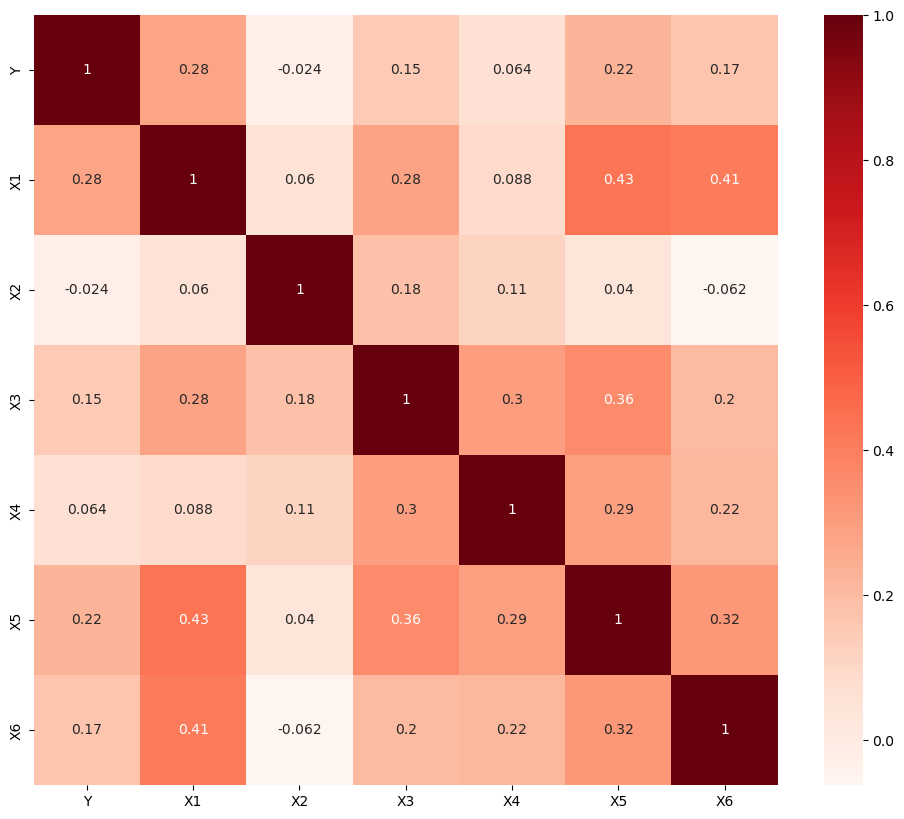

In [44]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

The correlation matrix indicates that thhere are no features correlated to each other.

In [113]:
df = df.drop(columns=['X2', 'X4','X3'])
df.head()

,Y,X1,X5,X6
0,0,3,2,4
1,0,3,4,3
2,1,5,3,5
3,0,5,3,5
4,0,5,3,5


### Prepare dataset

In [156]:
y = df['Y']
X = df.iloc[:,1:]
print(X.shape, y.shape)

(126, 3) (126,)


In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=50)


### Training and evaluate different models

In [158]:
# Instnatiating the models 
logistic_regression = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
rf =  RandomForestClassifier(max_depth=2, random_state=0)
bst = XGBClassifier(n_estimators=2, max_depth=1, learning_rate=1, objective='binary:logistic')

# Training the models 
logistic_regression.fit(X_train, y_train)
svm.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)
bst.fit(X_train, y_train)

# Making predictions with each model
log_reg_preds = logistic_regression.predict(X_test)
svm_preds = svm.predict(X_test)
tree_preds = tree.predict(X_test)
rf_preds = rf.predict(X_test)
bst_preds = bst.predict(X_test)

In [159]:
model_preds = {
    "Logistic Regression": log_reg_preds,
    "Support Vector Machine": svm_preds,
    "Decision Tree": tree_preds,
    "Random forest": rf_preds,
    "XGBoost": bst_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.75      0.43      0.55         7
           1       0.56      0.83      0.67         6

    accuracy                           0.62        13
   macro avg       0.65      0.63      0.61        13
weighted avg       0.66      0.62      0.60        13

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.50      0.83      0.62         6

    accuracy                           0.54        13
   macro avg       0.58      0.56      0.51        13
weighted avg       0.59      0.54      0.50        13

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.80      0.67      0.73         6

    accuracy                           0.77        13
   macro avg       0.78      0.76      0.76 

From the result it is clear that the best models are the Decision Tree and the XGBoost reaching 77% accuracy on the test set. Also the values of the precision, recall and F1_score on the two class predicted are accetable considering the limited amount of data. Let's know examine the confusion matrix relative to the choosen model the XGBoost.

In [160]:
confusion_matrix(y_test.values, bst_preds)


array([[5, 2],
       [1, 5]], dtype=int64)

In [161]:
tn, fp, fn, tp = confusion_matrix(y_test.values, bst_preds).ravel()
print(f"Number of true positive: {tp}, number of false negative:{fn}, number of true negatives: {tn}, number of false positive {fp}.")

Number of true positive: 5, number of false negative:1, number of true negatives: 5, number of false positive 2.


From the confusion matrix we can notice that the result it's not great considering that on a sample containing 13 data 3 of those are misclassified (1 false negative and 2 false positive). Now let's have a better look at the misclassified samples.


In [162]:
idx_correct_classified=[]
idx_false_negative=[]
idx_false_positive=[]
for ind, el in np.ndenumerate(bst_preds):
    #print(f"pred is: {el} while real is: {y_test.values[ind[0]]}")
    if el == y_test.values[ind[0]]:
        idx_correct_classified.append(ind[0])
    if el == 0 and y_test.values[ind[0]] == 1:
        idx_false_negative.append(ind[0])
    if el == 1 and y_test.values[ind[0]] == 0:
        idx_false_positive.append(ind[0])


Corrected classified:5, 2
Corrected classified:5, 5
Corrected classified:4, 5
Corrected classified:5, 4
Corrected classified:3, 4
Corrected classified:4, 2
Corrected classified:4, 4
Corrected classified:4, 3
Corrected classified:5, 4
Corrected classified:5, 5
False negative:4, 2
False positive:5, 3
False positive:5, 3


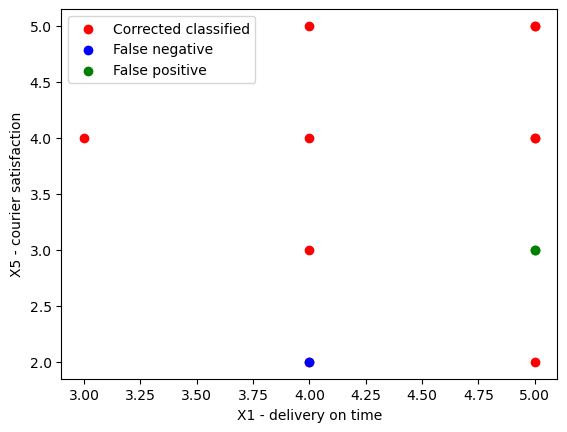

In [163]:
#fig, ax = plt.subplots()
for el in idx_correct_classified:
    a=plt.scatter(X_test.X1.values[el], X_test.X5.values[el], color='red', label='Corrected classified')
    print(f"Corrected classified:{X_test.X1.values[el]}, {X_test.X5.values[el]}")
for el in idx_false_negative:
    b=plt.scatter(X_test.X1.values[el], X_test.X5.values[el], color='blue', label='False negative')
    print(f"False negative:{X_test.X1.values[el]}, {X_test.X5.values[el]}")
for el in idx_false_positive:
    c=plt.scatter(X_test.X1.values[el], X_test.X5.values[el], color='green', label='False positive')
    print(f"False positive:{X_test.X1.values[el]}, {X_test.X5.values[el]}")
plt.legend((a,b,c),('Corrected classified','False negative','False positive'))
plt.xlabel("X1 - delivery on time")
plt.ylabel("X5 - courier satisfaction")
plt.show()

Examing the graph above we can see that our model tend to classify as false negatives the samples with X1=3. The false positive instead are the ones where X1=5. Given the limited amount of data available in order to improve the classification it is suggested to collect more data samples in general and preferrably with X1=3, X1=5. 

### Feature importance

In [164]:
sorted_idx = np.argsort(bst.feature_importances_)[::-1]
for index in sorted_idx:
    print([X_train.columns[index], bst.feature_importances_[index]]) 

['X1', 0.7213937]
['X6', 0.27860627]
['X5', 0.0]


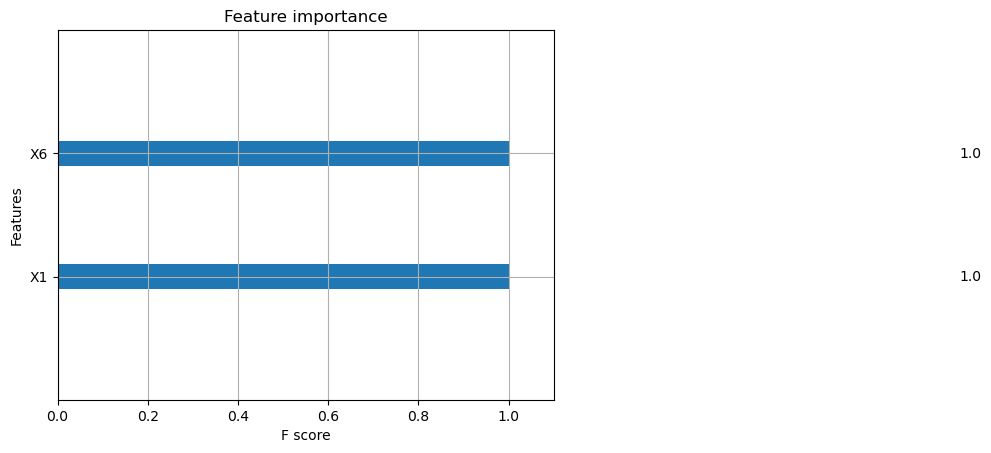

In [169]:
plot_importance(bst)
plt.show()